In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ticker = 'SPY'

In [73]:
results = pd.read_csv(f"{ticker}_backtest_results.csv")
results

,holding_days,start_date,end_date,roi,sharpe,mdd
0,252,1993-01-29 00:00:00+00:00,1994-01-26 00:00:00+00:00,0.103861,0.072563,-0.046749
1,252,1993-02-01 00:00:00+00:00,1994-01-27 00:00:00+00:00,0.106200,0.073916,-0.046749
2,252,1993-02-02 00:00:00+00:00,1994-01-28 00:00:00+00:00,0.106752,0.074259,-0.046749
3,252,1993-02-03 00:00:00+00:00,1994-01-31 00:00:00+00:00,0.103038,0.072130,-0.046749
4,252,1993-02-04 00:00:00+00:00,1994-02-01 00:00:00+00:00,0.092748,0.065440,-0.046749
...,...,...,...,...,...,...
11344,2268,1994-01-21 00:00:00+00:00,2003-01-23 00:00:00+00:00,1.168306,0.034139,-0.475159
11345,2268,1994-01-24 00:00:00+00:00,2003-01-24 00:00:00+00:00,1.119744,0.033297,-0.475159
11346,2268,1994-01-25 00:00:00+00:00,2003-01-27 00:00:00+00:00,1.090787,0.032792,-0.475159
11347,2268,1994-01-26 00:00:00+00:00,2003-01-28 00:00:00+00:00,1.100683,0.032962,-0.475159


# ROI Univariates

In [30]:
print(f"MIN:  {int(results.roi.min().round(2) * 100)}%")
print(f"MEAN:  {int(results.roi.mean().round(2) * 100)}%")
print(f"MAX:   {int(results.roi.max().round(2) * 100)}%")

MIN:  -45%
MEAN:  84%
MAX:   293%


<Axes: ylabel='Frequency'>

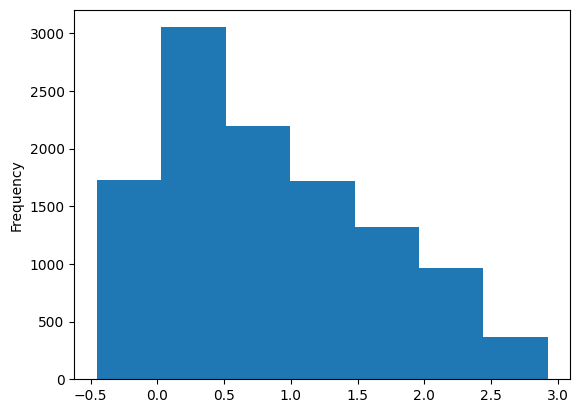

In [57]:
results.roi.plot.hist(bins=7)

---
# Correlates

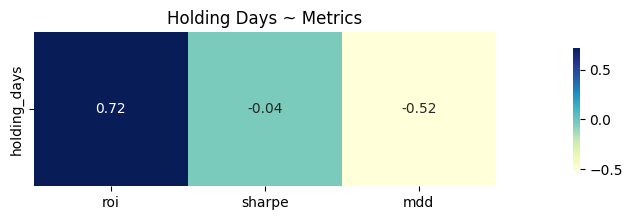

In [50]:
corr_matrix = results[["holding_days", "roi", "sharpe", "mdd"]].corr()[["roi", "sharpe", "mdd"]].head(1)
plt.figure(figsize=(20, 2))
sns.heatmap(corr_matrix, 
            annot=True,          
            fmt=".2f",           
            cmap="YlGnBu",      
            square=True,        
            cbar_kws={"shrink": .80})
plt.title('Holding Days ~ Metrics', fontsize=12)
plt.show()

---
# Plot Correlations

<Axes: xlabel='holding_days'>

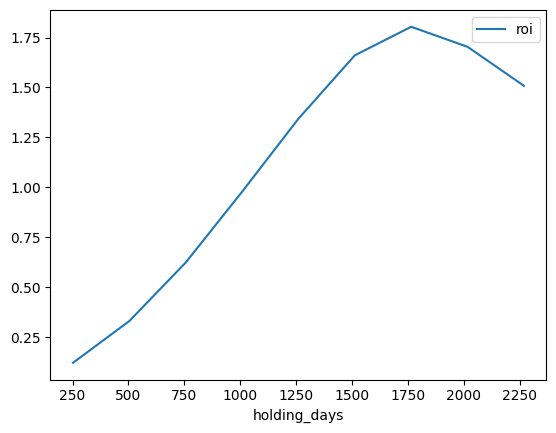

In [51]:
days_mean = results[["holding_days", "roi", "sharpe", "mdd"]].groupby("holding_days").mean().reset_index(drop=False)
days_mean[["holding_days", "roi"]].plot(x="holding_days", y="roi")

<Axes: xlabel='holding_days'>

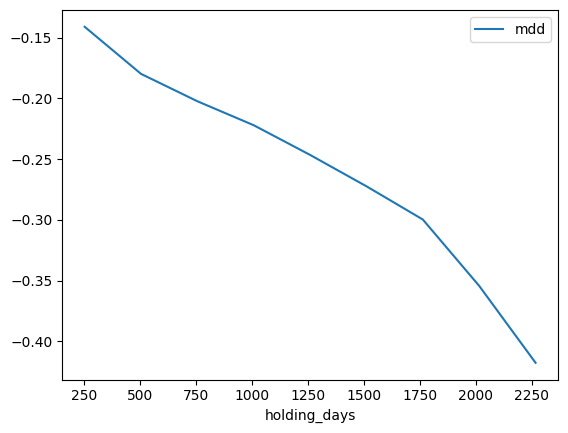

In [52]:
days_mean[["holding_days", "mdd"]].plot(x="holding_days", y="mdd")

<Axes: xlabel='holding_days'>

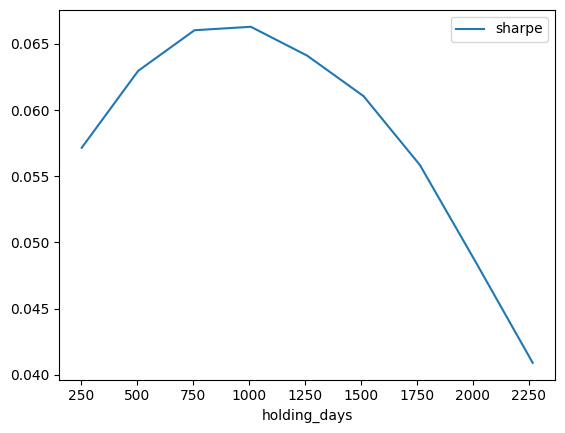

In [53]:
days_mean[["holding_days", "sharpe"]].plot(x="holding_days", y="sharpe")

# Metrics by Periods

In [64]:
results

,holding_days,start_date,end_date,roi,sharpe,mdd
0,252,1993-01-29 00:00:00+00:00,1994-01-26 00:00:00+00:00,0.103861,0.072563,-0.046749
1,252,1993-02-01 00:00:00+00:00,1994-01-27 00:00:00+00:00,0.106200,0.073916,-0.046749
2,252,1993-02-02 00:00:00+00:00,1994-01-28 00:00:00+00:00,0.106752,0.074259,-0.046749
3,252,1993-02-03 00:00:00+00:00,1994-01-31 00:00:00+00:00,0.103038,0.072130,-0.046749
4,252,1993-02-04 00:00:00+00:00,1994-02-01 00:00:00+00:00,0.092748,0.065440,-0.046749
...,...,...,...,...,...,...
11344,2268,1994-01-21 00:00:00+00:00,2003-01-23 00:00:00+00:00,1.168306,0.034139,-0.475159
11345,2268,1994-01-24 00:00:00+00:00,2003-01-24 00:00:00+00:00,1.119744,0.033297,-0.475159
11346,2268,1994-01-25 00:00:00+00:00,2003-01-27 00:00:00+00:00,1.090787,0.032792,-0.475159
11347,2268,1994-01-26 00:00:00+00:00,2003-01-28 00:00:00+00:00,1.100683,0.032962,-0.475159


In [68]:
print(results.groupby("holding_days")["roi"].agg(['min', 'mean', 'max']))

                   min      mean       max
holding_days                              
252          -0.330309  0.123079  0.537293
504          -0.452852  0.332100  0.935496
756          -0.400075  0.624738  1.346918
1008         -0.293175  0.978696  1.962333
1260         -0.146201  1.344065  2.496490
1512          0.168081  1.660898  2.833877
1764          0.488452  1.803676  2.925739
2016          0.923351  1.703426  2.575027
2268          0.963141  1.508438  2.042108


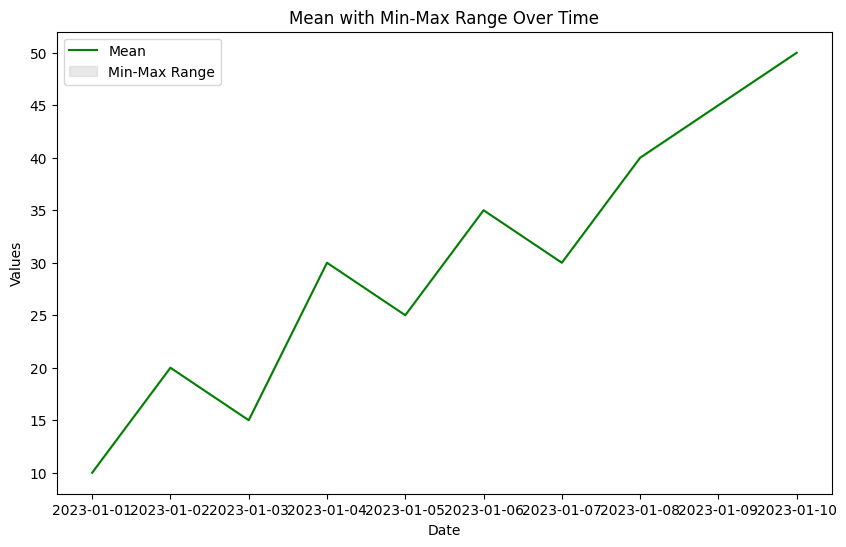

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with time and values
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Values': [10, 20, 15, 30, 25, 35, 30, 40, 45, 50]
})

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample by day (or other frequency if needed) and calculate min, mean, max
stats_df = df.resample('D').agg(['min', 'mean', 'max'])

# Plot the mean line
plt.figure(figsize=(10, 6))
plt.plot(stats_df.index, stats_df['Values', 'mean'], label='Mean', color='green')

# Plot the shaded area between min and max
plt.fill_between(
    stats_df.index,
    stats_df['Values', 'min'],
    stats_df['Values', 'max'],
    color='lightgrey',
    alpha=0.5,
    label='Min-Max Range'
)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Mean with Min-Max Range Over Time')
plt.legend()
plt.show()


In [71]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame with time and values
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Values': [10, 20, 15, 30, 25, 35, 30, 40, 45, 50]
})

# Resample by day (or other frequency if needed) and calculate min, mean, max
stats_df = df.set_index('Date').resample('D').agg(['min', 'mean', 'max'])

# Create a Plotly figure
fig = go.Figure()

# Add the shaded area for min-max range
fig.add_trace(go.Scatter(
    x=stats_df.index,
    y=stats_df['Values', 'max'],
    mode='lines',
    line=dict(width=0),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=stats_df.index,
    y=stats_df['Values', 'min'],
    mode='lines',
    fill='tonexty',  # Fills between min and max
    fillcolor='rgba(173,216,230,0.3)',  # Light blue with some transparency
    line=dict(width=0),
    showlegend=True,
    name='Min-Max Range'
))

# Add the mean line
fig.add_trace(go.Scatter(
    x=stats_df.index,
    y=stats_df['Values', 'mean'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Mean'
))

# Customize layout
fig.update_layout(
    title='Min, Mean, and Max Values Over Time',
    xaxis_title='Date',
    yaxis_title='Values',
    template='plotly_white'
)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'